# UPEM Data QC for WRF Comparison
__Author__: Pat McCornack

__Date__: 11/15/24

__Purpose__: Clean and check the Upper Embudo Canyon data to be used in WRF model validation. 

__Notes__:
- The fog drip data should really only be used for summer months. It's likely that there's significant rain bycatch in the winter.
- I had to guess which variable was wind direction - I chose WS_ms_WVc(2) based on the 0-360 range. 
- There's another dataset for summer 2011 but: 1. There's no wind data 2. The air temperature data doesn't look reasonable. I did not include it here. 


__TO DO__:
- Follow up on notes in individual sections

In [116]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Prepare Data 

In [117]:
#### Read in main dataset ####
df_original = pd.read_csv('/Users/patmccornack/Documents/ucsb_fog_project/SCI_Fog_Project_Repo/data/Still Lab Data/relevant/UPEM/UPEMdata_joined.csv')

# Create single datetime column
times = []
for index, row in df_original.iterrows():
    times.append(f"{str(row['Year']).split('.')[0]}-{str(row['Month']).split('.')[0]}-{str(row['Day']).split('.')[0]} {str(row['Hour']).split('.')[0]}:{str(row['Minute']).split('.')[0]}:00")

df_original['time'] = pd.to_datetime(times)
df_original = df_original.sort_values(by='time', ascending=True)

# Subset to relevant variables
var_dict = {'time (PST)' : df_original['time'],
            'air temperature (C)' : df_original['AirTC_Avg'],
            'relative humidity (%)' : df_original['RH_Avg'],
            'wind speed (m/s)' : df_original['WS_ms_Avg'],
            'wind direction (deg)' : df_original['WS_ms_WVc(2)'],
            'wind gust (m/s)' : df_original['WS_ms_Max'],
            'rain (mm)' : df_original['Rain_Converted_mm'],
            'fog drip' : df_original['Fog_Vol_mL']}

df = pd.DataFrame(var_dict)
df.set_index('time (PST)', inplace = True)
df.head()


,air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s),rain (mm),fog drip
time (PST),,,,,,,
2005-09-15 15:15:00,15.98,74.25,2.309,240.6,3.180,NaN,NaN
2005-09-15 15:30:00,15.55,75.94,2.649,245.7,3.481,NaN,NaN
2005-09-15 15:45:00,15.27,77.03,2.896,249.4,3.490,NaN,NaN
2005-09-15 16:00:00,14.84,78.88,3.144,244.6,3.845,NaN,NaN
2005-09-15 16:15:00,14.11,81.70,3.279,232.6,3.882,NaN,NaN


In [118]:
#### Read in summer 2010 dataset ####
df_2010 = pd.read_csv('/Users/patmccornack/Documents/ucsb_fog_project/SCI_Fog_Project_Repo/data/Still Lab Data/relevant/UPEM/Met_SCI-UPEM-July-Sept-2010.csv')

# Create single datetime column
times = []
for index, row in df_2010.iterrows():
    times.append(f"{str(row['year']).split('.')[0]}-{str(row['month']).split('.')[0]}-{str(row['day']).split('.')[0]} {str(row['hour']).split('.')[0]}:{str(row['minute']).split('.')[0]}:00")

df_2010['time'] = pd.to_datetime(times)
df_2010 = df_2010.sort_values(by='time', ascending=True)

# Subset to relevant variables
var_dict = {'time (PST)' : df_2010['time'],
            'air temperature (C)' : df_2010['airtc_avg'],
            'relative humidity (%)' : df_2010['rh_avg'],
            'wind speed (m/s)' : df_2010['ws_ms_avg'],
            'wind direction (deg)' : np.nan,  # dataset only has avg wind speed
            'wind gust (m/s)' : np.nan,
            'rain (mm)' : df_2010['rain_converted_mm'],
            'fog drip' : df_2010['fog_vol_ml']}

df_2010 = pd.DataFrame(var_dict)
df_2010.set_index('time (PST)', inplace = True)

df_2010.head()

,air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s),rain (mm),fog drip
time (PST),,,,,,,
2010-07-01 00:00:00,9.37,100.0,2.712,NaN,NaN,0.0,0.0000
2010-07-01 00:15:00,9.39,100.0,2.448,NaN,NaN,0.0,3.7253
2010-07-01 00:30:00,9.42,100.0,2.222,NaN,NaN,0.0,7.4506
2010-07-01 00:45:00,9.35,100.0,2.309,NaN,NaN,0.0,0.0000
2010-07-01 01:00:00,9.29,100.0,1.632,NaN,NaN,0.0,3.7253


In [119]:
#### Join 2010 data to main data ####
df = pd.concat([df, df_2010])

In [120]:
#### Add attributes to dataframe #### 
df.attrs['Description'] = 'Upper Embudo Canyon Met Station (From Chris Still)'
df.attrs['Code'] = 'UPEM'
df.attrs['Latitude'] = 34.012531, 
df.attrs['Longitude'] = -119.801828
#df.attrs['Elevation m'] = 

# Data QC Checks

## Summary Stats

__Things to check__:

Air temperature minimum outlier:
- That far below freezing seems unreasonable, likely a sensor failure. 

RH minimum outlier
- Seems unlikely to have close to 0 RH, but not entirely impossible on a hot day. 

Fog drip maximum outlier
- Reminder that fog drip data should only be consider valid in the summer for this dataset due to significant winter rain bycatch. 

In [121]:
df.describe()

,air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s),rain (mm),fog drip
count,145959.000000,145959.000000,145959.000000,137674.000000,137674.000000,133471.000000,133471.000000
mean,14.159025,68.766700,1.537760,236.776337,2.141571,0.014224,0.575321
std,5.687741,28.767027,1.119997,94.765955,1.325071,0.155906,3.238424
min,-20.700000,3.014000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.890000,45.960000,0.678000,149.000000,1.142000,0.000000,0.000000
50%,12.800000,76.300000,1.294000,283.800000,1.877000,0.000000,0.000000
75%,17.810000,96.300000,2.139000,304.600000,2.840000,0.000000,0.000000
max,40.180000,100.000000,7.611000,677.000000,10.230000,11.245000,182.540000


In [122]:
df.head()

,air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s),rain (mm),fog drip
time (PST),,,,,,,
2005-09-15 15:15:00,15.98,74.25,2.309,240.6,3.180,NaN,NaN
2005-09-15 15:30:00,15.55,75.94,2.649,245.7,3.481,NaN,NaN
2005-09-15 15:45:00,15.27,77.03,2.896,249.4,3.490,NaN,NaN
2005-09-15 16:00:00,14.84,78.88,3.144,244.6,3.845,NaN,NaN
2005-09-15 16:15:00,14.11,81.70,3.279,232.6,3.882,NaN,NaN


## Air Temperature Outlier
- Note the data gap around 2007
- Check the very high (~40) value.
- The spike to -20 is certainly an error - replace it with NaN

__Findings__:
The max outlier seems to be real. The minimum outlier of -20C is in the middle of a data gap. The quailty of the data following that gap should be more closely studied. The -20 value was set to NaN. 

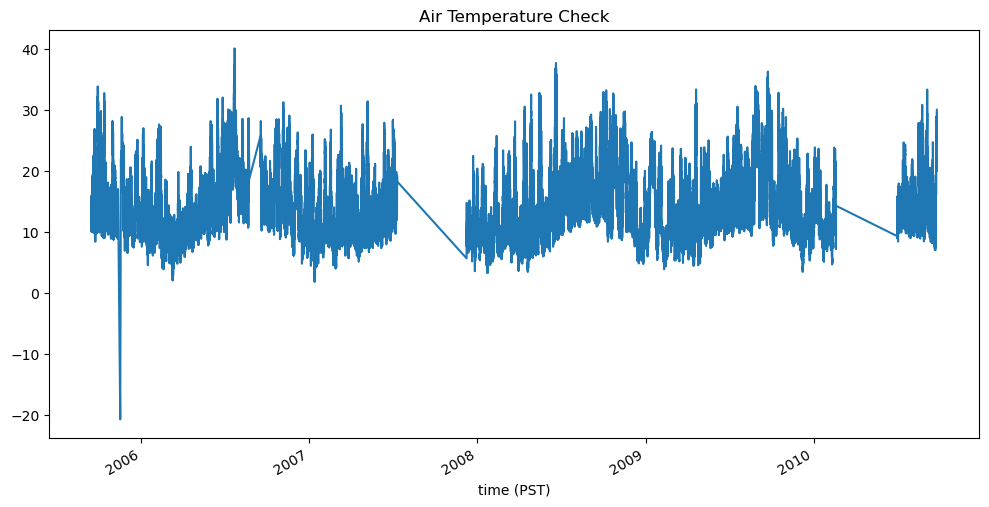

In [123]:
plt.figure(figsize=(12,6))
df['air temperature (C)'].plot()
plt.title('Air Temperature Check')
plt.show()

In [124]:
#### Find min/max air temperature observations
airtemps = df['air temperature (C)']
max_at = airtemps.loc[airtemps == airtemps.max()]
min_at = airtemps.loc[airtemps == airtemps.min()]

print(max_at)
print(min_at)

time (PST)
2006-07-23 15:30:00    40.18
Name: air temperature (C), dtype: float64
time (PST)
2005-11-17 08:45:00   -20.7
Name: air temperature (C), dtype: float64


air temperature (C)       40.180
relative humidity (%)     17.750
wind speed (m/s)           1.669
wind direction (deg)     327.000
wind gust (m/s)            1.939
rain (mm)                  0.000
fog drip                   0.000
Name: 2006-07-23 15:30:00, dtype: float64


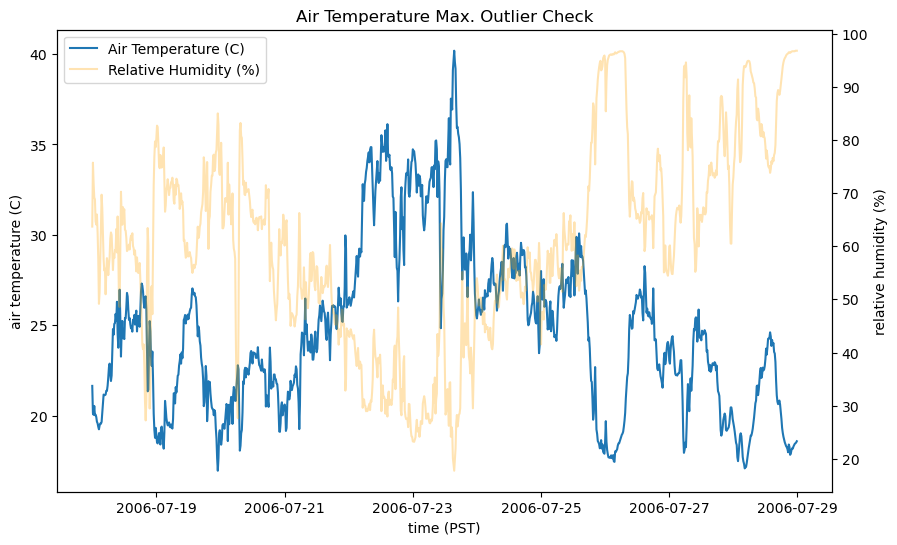

In [125]:
#### Check the max air temp values ####
print(df.loc['2006-07-23 15:30:00'])
at_max_subset = df['2006-07-18':'2006-07-28']

# Plot Temperature/RH
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=at_max_subset['air temperature (C)'],
             label='Air Temperature (C)')
ax2 = ax.twinx()
sns.lineplot(data=at_max_subset['relative humidity (%)'],
             label='Relative Humidity (%)',
             color='orange',
             alpha=0.3,
             ax=ax2)
ax2.legend_.remove()

plt.title('Air Temperature Max. Outlier Check')

# Combine legends
handles1, labels1 = ax.get_legend_handles_labels()  # Handles and labels from ax
handles2, labels2 = ax2.get_legend_handles_labels()  # Handles and labels from ax2
ax.legend(handles1 + handles2, labels1 + labels2, loc='upper left')  # Combine and set location

plt.show()


air temperature (C)     -20.700
relative humidity (%)    62.830
wind speed (m/s)          0.093
wind direction (deg)     73.700
wind gust (m/s)           0.301
rain (mm)                   NaN
fog drip                    NaN
Name: 2005-11-17 08:45:00, dtype: float64


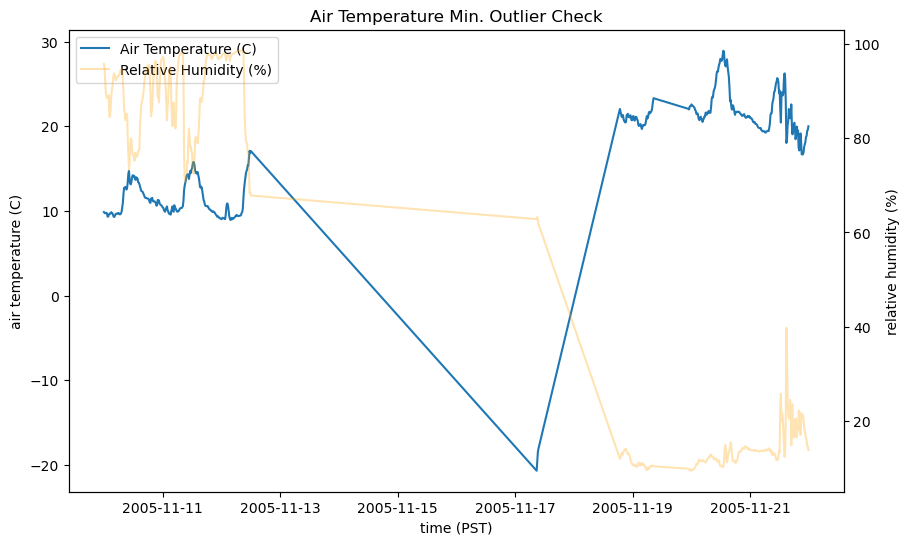

In [126]:
#### Check the minimum air temperature values ####
print(df.loc['2005-11-17 08:45:00'])
at_min_subset = df['2005-11-10':'2005-11-21']

# Plot Temperature/RH
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=at_min_subset['air temperature (C)'],
             label='Air Temperature (C)')
ax2 = ax.twinx()
sns.lineplot(data=at_min_subset['relative humidity (%)'],
             label='Relative Humidity (%)',
             color='orange',
             alpha=0.3,
             ax=ax2)
ax2.legend_.remove()

plt.title('Air Temperature Min. Outlier Check')

# Combine legends
handles1, labels1 = ax.get_legend_handles_labels()  # Handles and labels from ax
handles2, labels2 = ax2.get_legend_handles_labels()  # Handles and labels from ax2
ax.legend(handles1 + handles2, labels1 + labels2, loc='upper left')  # Combine and set location

plt.show()

In [127]:
#### Find the outliers ####
df_subset = df['2005-11-17 00:00:00' : '2005-11-18 00:00:00']
air_temp_outliers = df_subset.index.tolist()
df_subset.head()

,air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s),rain (mm),fog drip
time (PST),,,,,,,
2005-11-17 08:45:00,-20.70,62.83,0.093,73.7,0.301,NaN,NaN
2005-11-17 09:00:00,-19.67,63.26,0.217,107.5,0.381,NaN,NaN
2005-11-17 09:15:00,-18.49,62.71,0.330,99.4,0.972,NaN,NaN
2005-11-17 09:30:00,-18.08,61.78,0.601,117.9,1.568,NaN,NaN


In [128]:
#### Set the outliers to NaN ###
df.loc[df.index.isin(air_temp_outliers), 'air temperature (C)'] = np.nan

## RH Outlier Check
__Findings__: No obvious problems beyond the gaps.

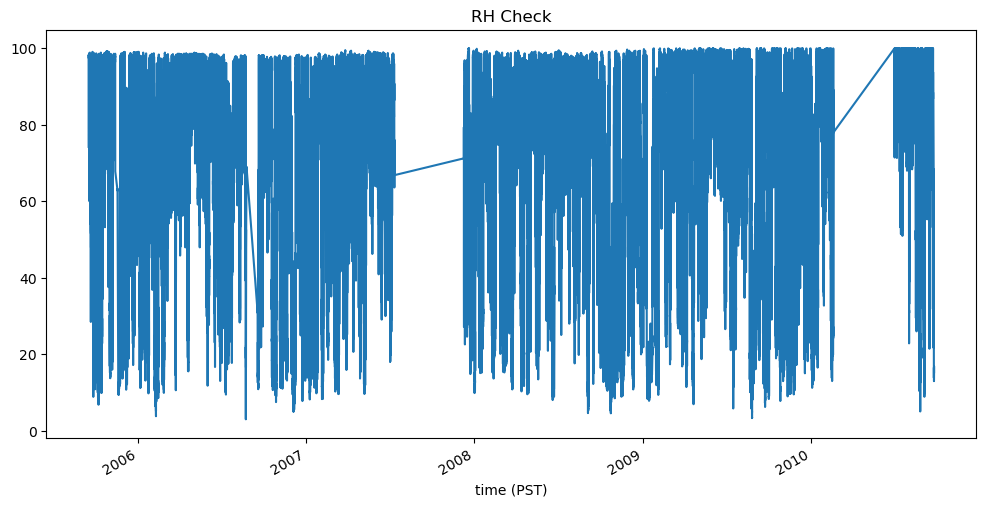

In [129]:
plt.figure(figsize=(12,6))
df['relative humidity (%)'].plot()
plt.title('RH Check')
plt.show()

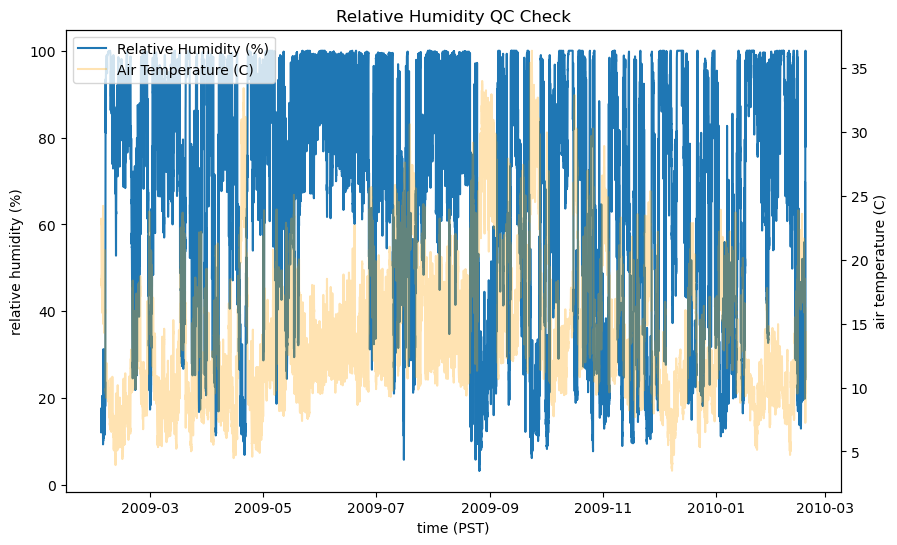

In [130]:
#### Check that RH tracks with Temperature ####

rh_subset = df['2009-02-02 11:45:00	':'2010-02-18 15:15:00']

# Plot Temperature/RH
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=rh_subset['relative humidity (%)'],
             label='Relative Humidity (%)')
ax2 = ax.twinx()
sns.lineplot(data=rh_subset['air temperature (C)'],
             label='Air Temperature (C)',
             color='orange',
             alpha=0.3,
             ax=ax2)
ax2.legend_.remove()

plt.title('Relative Humidity QC Check')

# Combine legends
handles1, labels1 = ax.get_legend_handles_labels()  # Handles and labels from ax
handles2, labels2 = ax2.get_legend_handles_labels()  # Handles and labels from ax2
ax.legend(handles1 + handles2, labels1 + labels2, loc='upper left')  # Combine and set location

plt.show()


## Quick Check of Wind Data

__Findings__: No obvious issues beyond data gaps and single errant wind direction value

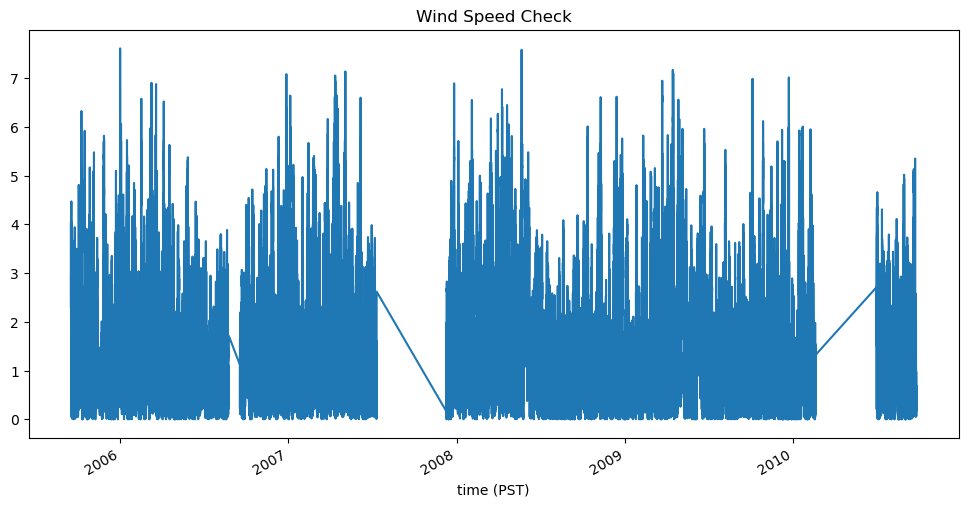

In [131]:
plt.figure(figsize=(12, 6))
df['wind speed (m/s)'].plot()
plt.title('Wind Speed Check')
plt.show()

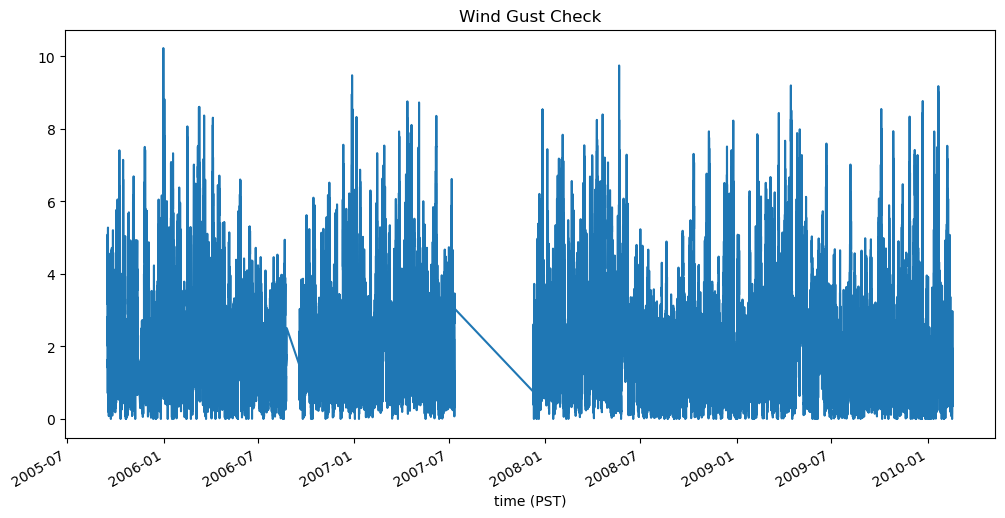

In [132]:
plt.figure(figsize=(12, 6))
df['wind gust (m/s)'].plot()
plt.title('Wind Gust Check')
plt.show()

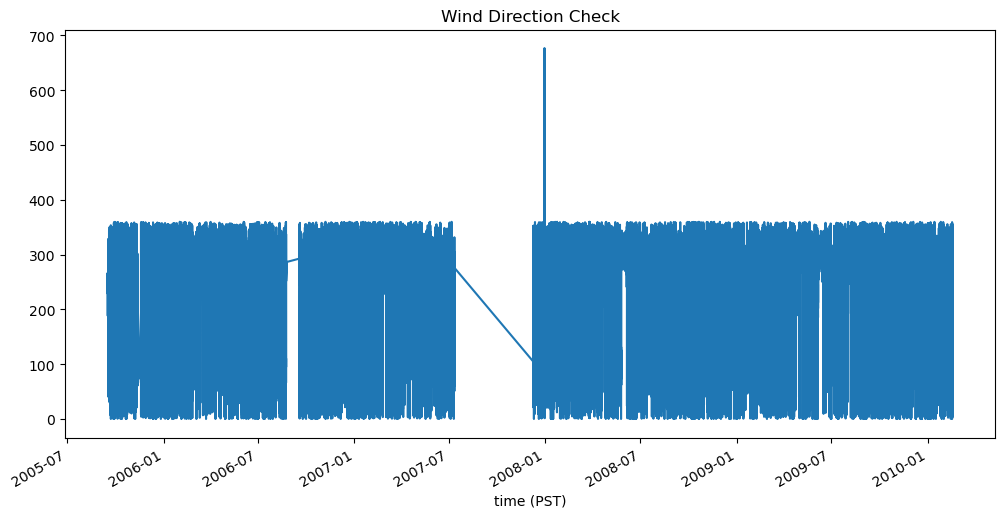

In [133]:
plt.figure(figsize=(12, 6))
df['wind direction (deg)'].plot()
plt.title('Wind Direction Check')
plt.show()

In [134]:
#### Set single errant value to NaN ####
df.loc[df['wind direction (deg)'] > 360] = np.nan

## Rain Check

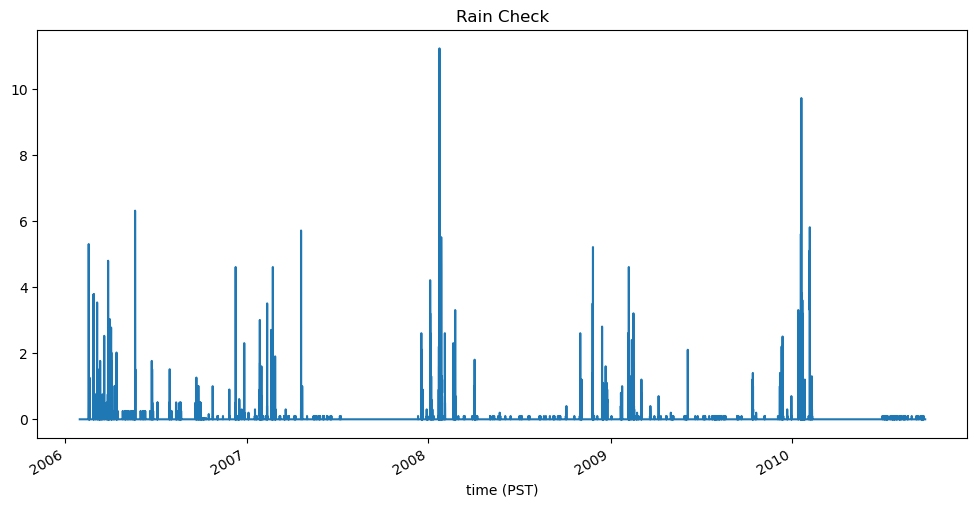

In [135]:
plt.figure(figsize=(12,6))
df['rain (mm)'].plot()
plt.title('Rain Check')
plt.show()

# Aggregate Data 

In [136]:
df_monthly = df.resample('ME').mean()
rain_fog_sums = df[['rain (mm)', 'fog drip']].resample('ME').sum()
df_monthly['rain sum (mm)'] = rain_fog_sums['rain (mm)']
df_monthly['fog drip sum'] = rain_fog_sums['fog drip']
df_monthly.rename(columns={'rain (mm)' : 'rain mean (mm)', 
                           'fog drip' : 'fog drip mean'}, inplace=True)
df_monthly.head(1)

,air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s),rain mean (mm),fog drip mean,rain sum (mm),fog drip sum
time (PST),,,,,,,,,
2005-09-30,17.111173,67.798061,1.416398,192.480716,1.999543,NaN,NaN,0.0,0.0


In [137]:
#### Aggregate cumsums from July-July to match WRF output ####
# Rain
df_monthly['water_year'] = df_monthly.index.year + (df_monthly.index.month >= 7)
df_monthly['rain cumsum (mm)'] = df_monthly.groupby('water_year')['rain sum (mm)'].cumsum()

# Fog
df_monthly['fog cumsum (mm)'] = df_monthly.groupby('water_year')['fog drip sum'].cumsum()

df_monthly.drop('water_year', axis=1, inplace=True)


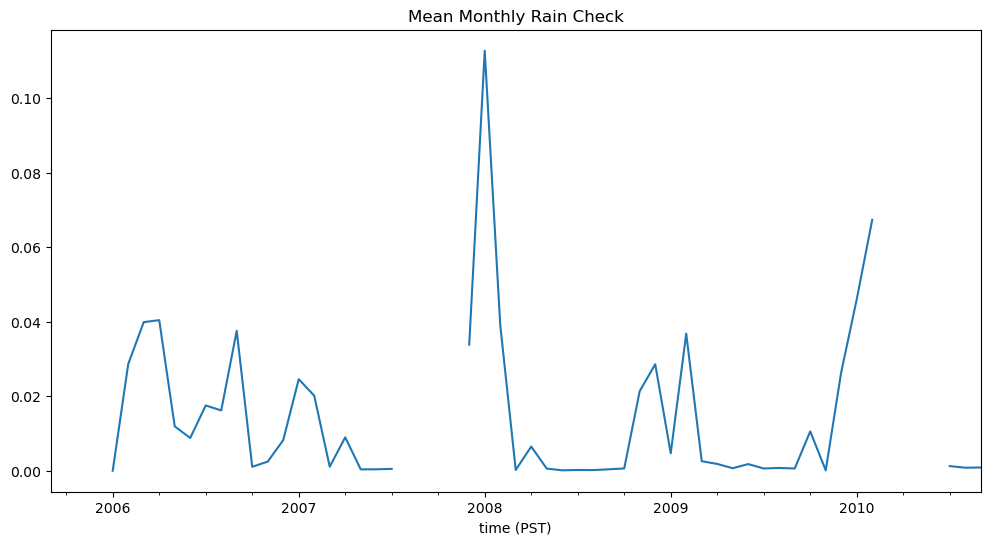

In [138]:
#### Rain Check ####
plt.figure(figsize=(12,6))
df_monthly['rain mean (mm)'].plot()
plt.title('Mean Monthly Rain Check')
plt.show()

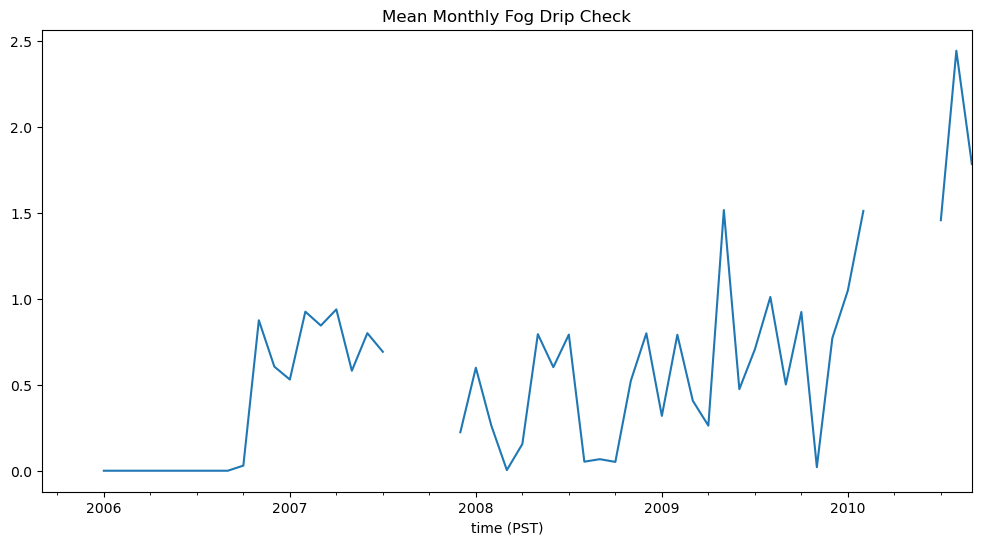

In [139]:
#### Fog Check ####
plt.figure(figsize=(12,6))
df_monthly['fog drip mean'].plot()
plt.title('Mean Monthly Fog Drip Check')
plt.show()

In [153]:
#### Resample fog to hourly to match WRF timescale ####
sum_hourly = df[['fog drip', 'rain (mm)']].resample('h').sum()
max_hourly = df['wind gust (m/s)'].resample('h').max()
mean_hourly = df[['air temperature (C)', 'relative humidity (%)', 'wind speed (m/s)', 'wind direction (deg)']].resample('h').mean()

df_hourly = pd.concat([sum_hourly, max_hourly, mean_hourly], axis=1)

# Save out cleaned data

## Save out original data

In [140]:
outdir = '/Users/patmccornack/Documents/ucsb_fog_project/SCI_Fog_Project_Repo/data/csv/preprocessed'
out_file = 'UPEM_clean.csv'  # NOTE: More prep should be done (e.g. removing data) before this can actually be considered clean
df.to_csv(os.path.join(outdir, out_file))

## Save out resampled data


In [141]:
out_file = 'UPEM_monthly_clean.csv'  # NOTE: More prep should be done (e.g. removing data) before this can actually be considered clean
df_monthly.to_csv(os.path.join(outdir, out_file))

## Save out hourly fog data

In [154]:
out_file = 'UPEM_hourly.csv'
df_hourly.to_csv(os.path.join(outdir, out_file))